In [3]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


In [2]:
df = pd.read_csv('D:/Nitte_NLP/nlp-basics/Day-2/Supervised_Classification/cleaned_text_data.csv')

In [7]:
# Test Vader
vader = SentimentIntensityAnalyzer()

example_text = 'the product was awesome'
vader.polarity_scores(example_text)

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [8]:
# Initialize VADER
vader = SentimentIntensityAnalyzer()

# Function to classify based on VADER compound score
def classify_vader_sentiment(text):
    scores = vader.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

# Apply VADER to your cleaned text
df['vader_sentiment'] = df['cleaned_text'].apply(classify_vader_sentiment)

print(df[['cleaned_text', 'sentiment', 'vader_sentiment']].head())


                cleaned_text sentiment vader_sentiment
0   awful completely useless  negative        negative
1  highly recommend everyone  positive        positive
2      worst experience ever  negative        negative
3   topnotch service product  positive         neutral
4                worth money  negative        positive



Classification Report (VADER vs True Labels):
              precision    recall  f1-score   support

    negative       0.87      0.72      0.79        75
     neutral       0.34      0.22      0.27        60
    positive       0.49      0.75      0.59        65

    accuracy                           0.58       200
   macro avg       0.57      0.56      0.55       200
weighted avg       0.59      0.58      0.57       200



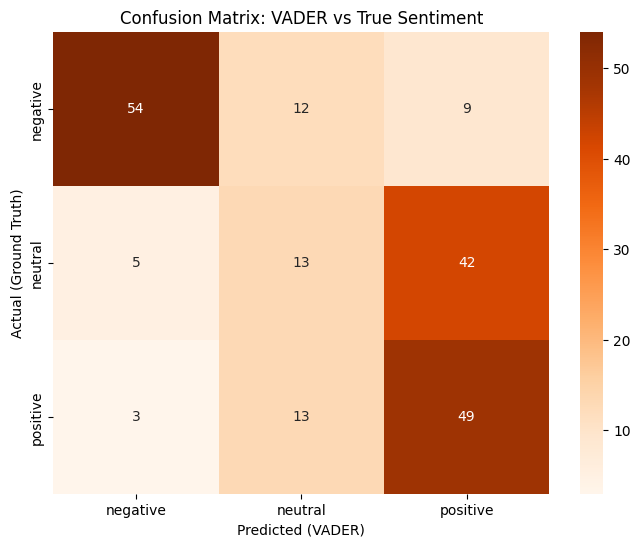

In [10]:
# Evaluate Unsupervised (VADER) vs Ground Truth
# Compare VADER predicted vs actual
print("\nClassification Report (VADER vs True Labels):")
print(classification_report(df['sentiment'], df['vader_sentiment']))

# Confusion Matrix
cm_vader = confusion_matrix(df['sentiment'], df['vader_sentiment'])

# Define your class labels manually
labels = ["negative", "neutral", "positive"]

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_vader, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted (VADER)')
plt.ylabel('Actual (Ground Truth)')
plt.title('Confusion Matrix: VADER vs True Sentiment')
plt.show()